In [192]:
import nltk
import argparse
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


In [193]:
parser = argparse.ArgumentParser()
parser.add_argument('file', help='name of file',  nargs='+')
parser.add_argument('-n', '--number', type=int, default=10, help='number of words in histogram')
parser.add_argument('-m','--minlen', type=int, default=0, help='minimal lenght of the word')

_StoreAction(option_strings=['-m', '--minlen'], dest='minlen', nargs=None, const=None, default=0, type=<class 'int'>, choices=None, help='minimal lenght of the word', metavar=None)

In [194]:
args = parser.parse_args("lotus-flower-en.txt lotus-flower-pl.txt -m 5 -n 6".split())


<Figure size 1440x1440 with 0 Axes>

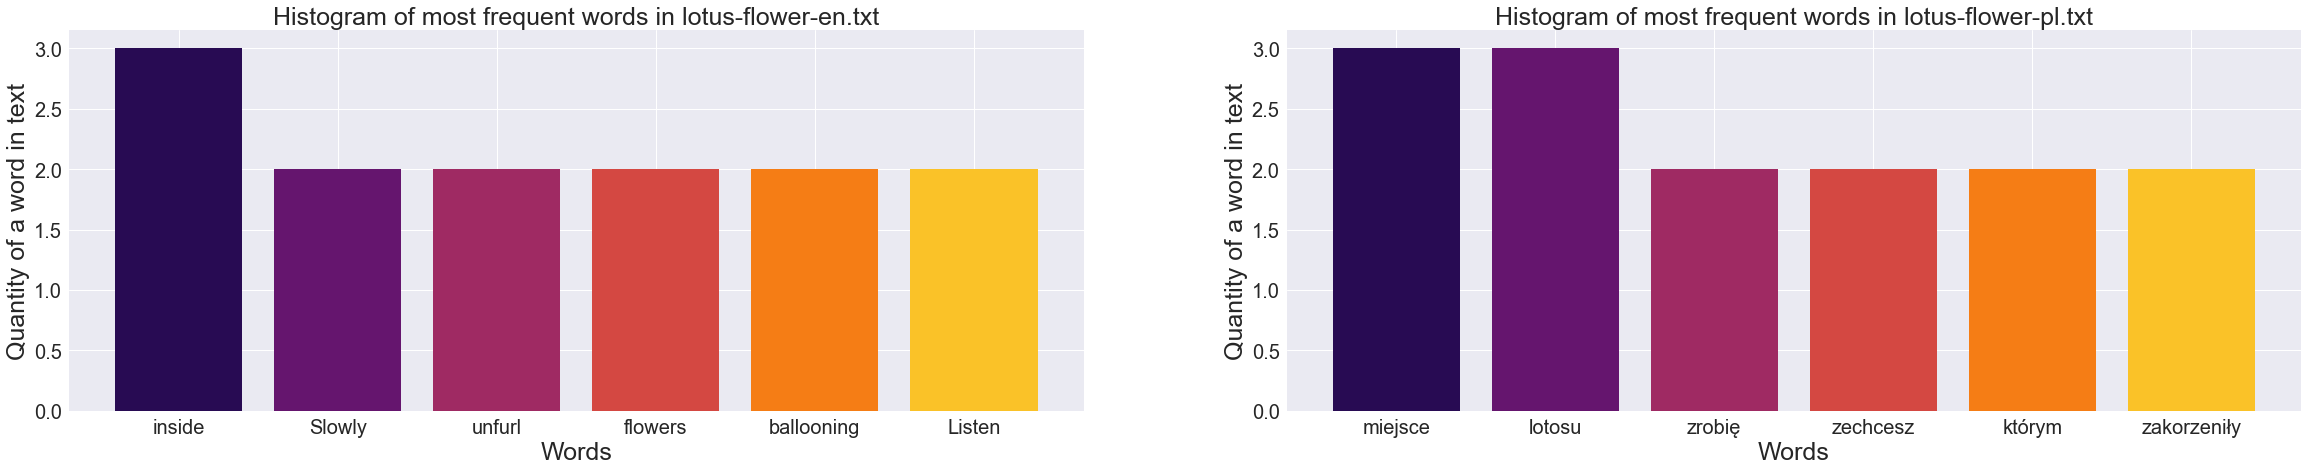

In [195]:
plt.style.use("seaborn")
n=args.number
fig = plt.figure(figsize=(20,20))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(40,7))
for i in range(2):
    with open(args.file[i], encoding='utf8') as f:
        text = f.read()
        words = nltk.word_tokenize(text)
        dict = { k : words.count(k) for k in words if k.isalpha() }
        #while len(data)< args.number:
        new_dict ={k:v for k,v in dict.items() if len(k)> args.minlen}
        data = {k:v for k,v in sorted(new_dict.items(), key=lambda item:item[1], reverse=True)[:int(args.number)]}
        palette = sns.color_palette("inferno", len(data))
        axes[i].bar(data.keys(), data.values(), align='center', color=palette)
        axes[i].set_xlabel('Words', fontsize=25)
        axes[i].set_ylabel('Quantity of a word in text', fontsize=25)
        axes[i].set_title(f'Histogram of most frequent words in {args.file[i]}', fontsize=25)
        axes[i].tick_params(axis='both', which='major', labelsize=20)

        